In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image
from dnn_app_utils_v3 import *
import torch
import torchvision
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. It's a cat picture.


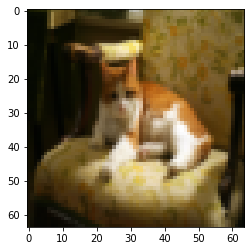

In [3]:
index = 7
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [4]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [5]:
train_x = torch.tensor(train_x.T, dtype=torch.float32)
train_y = torch.tensor(train_y.T, dtype=torch.float32)
print ("train_x's shape: " + str(train_x.shape))
print ("train_y's shape: " + str(train_y.shape))

test_x = torch.tensor(test_x.T, dtype=torch.float32)
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: torch.Size([209, 12288])
train_y's shape: torch.Size([209, 1])
test_x's shape: torch.Size([50, 12288])


In [6]:
train_ds = TensorDataset(train_x, train_y)
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)

In [7]:
model = torch.nn.Sequential(
    # 1
    torch.nn.Linear(12288, 20), 
    torch.nn.ReLU(),
    # 2
    torch.nn.Linear(20, 7), 
    torch.nn.ReLU(),
    # 3
    torch.nn.Linear(7, 5), 
    torch.nn.ReLU(),
    # 4
    torch.nn.Linear(5, 1), 
    torch.nn.Sigmoid()
    )

In [8]:
creterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [9]:
def train(epochs):
    for epoch in range (epochs):
        for x, y in train_dl:
            output = model(x)
            loss = creterion(output, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if epoch % 100 == 0:
            print(epoch, loss.item())

In [10]:
train(2500) # число итераций обучения

0 0.788971483707428
100 0.64140784740448
200 0.6842594146728516
300 0.48397108912467957
400 0.5640790462493896
500 0.7050912380218506
600 0.47911521792411804
700 0.5318652987480164
800 0.5492042303085327
900 0.42506736516952515
1000 0.24005690217018127
1100 0.2916317582130432
1200 0.08587179332971573
1300 0.07020776718854904
1400 0.09897823631763458
1500 0.027882834896445274
1600 0.031038276851177216
1700 0.015343802981078625
1800 0.016072900965809822
1900 0.00789986364543438
2000 0.009547163732349873
2100 0.010809632949531078
2200 0.006779252085834742
2300 0.006412638816982508
2400 0.006910873576998711


In [11]:
torch.save(model, "model.pt")

In [12]:
model = torch.load("model.pt")
model.eval()

Sequential(
  (0): Linear(in_features=12288, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=7, bias=True)
  (3): ReLU()
  (4): Linear(in_features=7, out_features=5, bias=True)
  (5): ReLU()
  (6): Linear(in_features=5, out_features=1, bias=True)
  (7): Sigmoid()
)

In [13]:
def predict(self, test_images):
    self.eval()
    
    count = test_images.shape[0]
    result_np = []
        
    for idx in range(0, count):
        pred = self(test_images[idx])
        pred_np = pred.detach().numpy()
        for elem in pred_np:
            result_np.append(elem)
    return result_np

In [14]:
res = predict(model, test_x)
print(len(res))
print(res)

50
[0.98826796, 0.9998951, 0.9597845, 0.9995246, 0.802215, 0.8894313, 0.0007096021, 0.8936491, 0.969533, 0.9836137, 0.9216989, 0.9993175, 0.9833175, 0.99992573, 1.860939e-05, 0.9920661, 0.0006264503, 0.9963205, 0.013314507, 1.9186687e-05, 0.9867323, 0.03594433, 2.799281e-06, 0.9886905, 0.87263954, 0.9538706, 0.9466009, 8.278319e-06, 0.010217051, 0.999587, 0.37373218, 0.98742, 0.9943785, 0.94544655, 0.74057436, 0.00013046726, 0.0015101942, 0.94954056, 0.50218195, 0.004907552, 0.8188795, 0.50415593, 0.7713171, 0.00085570087, 0.9956962, 0.034315977, 0.0080175325, 0.999764, 0.6501853, 0.0018090663]
